In [1]:
#Tomado de la página de CienciadeDatos.net
#https://www.cienciadedatos.net/documentos/py10-regresion-lineal-python.html
#Supóngase que un analista de deportes quiere saber si existe una relación entre el número de veces 
#que batean los jugadores de un equipo de béisbol y el número de runs que consigue. En caso de existir y 
#de establecer un modelo, podría predecir el resultado del partido



In [2]:
# Tratamiento de datos
# ==============================================================================
import pandas as pd
import numpy as np

# Gráficos
# ==============================================================================
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

# Preprocesado y modelado
# ==============================================================================
from scipy.stats import pearsonr
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
import statsmodels.formula.api as smf

%matplotlib inline



# Configuración matplotlib
# ==============================================================================
plt.rcParams['image.cmap'] = "bwr"
#plt.rcParams['figure.dpi'] = "100"
plt.rcParams['savefig.bbox'] = "tight"
style.use('ggplot') or plt.style.use('ggplot')

# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

In [3]:
# Datos
# ==============================================================================
equipos = ["Texas","Boston","Detroit","Kansas","St.","New_S.","New_Y.",
           "Milwaukee","Colorado","Houston","Baltimore","Los_An.","Chicago",
           "Cincinnati","Los_P.","Philadelphia","Chicago","Cleveland","Arizona",
           "Toronto","Minnesota","Florida","Pittsburgh","Oakland","Tampa",
           "Atlanta","Washington","San.F","San.I","Seattle"]
bateos = [5659,  5710, 5563, 5672, 5532, 5600, 5518, 5447, 5544, 5598,
          5585, 5436, 5549, 5612, 5513, 5579, 5502, 5509, 5421, 5559,
          5487, 5508, 5421, 5452, 5436, 5528, 5441, 5486, 5417, 5421]

runs = [855, 875, 787, 730, 762, 718, 867, 721, 735, 615, 708, 644, 654, 735,
        667, 713, 654, 704, 731, 743, 619, 625, 610, 645, 707, 641, 624, 570,
        593, 556]

datos = pd.DataFrame({'equipos': equipos, 'bateos': bateos, 'runs': runs})
datos.head(3)


,equipos,bateos,runs
0,Texas,5659,855
1,Boston,5710,875
2,Detroit,5563,787


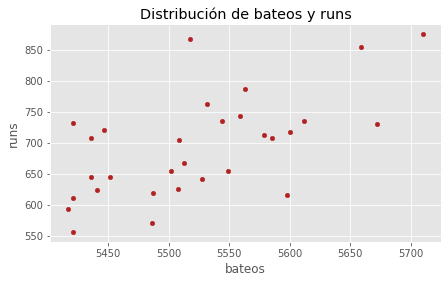

In [4]:
# Gráfico
# ==============================================================================
fig, ax = plt.subplots(figsize=(7, 4))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax
)
ax.set_title('Distribución de bateos y runs');

In [5]:
# Correlación lineal entre las dos variables
# ==============================================================================
corr_test = pearsonr(x = datos['bateos'], y =  datos['runs'])
print("Coeficiente de correlación de Pearson: ", corr_test[0])
print("P-value: ", corr_test[1])

Coeficiente de correlación de Pearson:  0.6106270467206685
P-value:  0.0003388351359791999


In [6]:
#El gráfico y el test de correlación muestran una relación lineal, de intensidad considerable (r = 0.61) y
#significativa (p-value = 0.000339). Tiene sentido intentar generar un modelo de regresión lineal con el objetivo
#de predecir el número de runs en función del número de bateos del equipo.


In [7]:
#https://machinelearningparatodos.com/regresion-lineal-en-python/ seguir con esto

In [8]:

# Creación del modelo
# ==============================================================================

X = datos[['bateos']]
y = datos['runs']


#Lo que hace reshape(-1) es mantener esa dimensión de tamaño indefinido y 
#hacer que se ajuste al resto de las dimensiones,(-1,1) (fila , columna) una colunna y filas indefinida

X.values.reshape(-1,1)
y.values.reshape(-1,1),
                                       
# Creación del modelo
# ==============================================================================
modelo = LinearRegression()

modelo.fit(X , y)




LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [9]:
 # Información del modelo
# ==============================================================================
print("Intercept:", modelo.intercept_)
print("Coeficiente:", list(zip(X.columns, modelo.coef_.flatten(), )))
print("Coeficiente de determinación R^2:", modelo.score(X, y))

Intercept: -2789.242885442254
Coeficiente: [('bateos', 0.6305499928382826)]
Coeficiente de determinación R^2: 0.3728653901868052


In [10]:
# Podemos predecir usando el modelo
y_pred = modelo.predict(X)


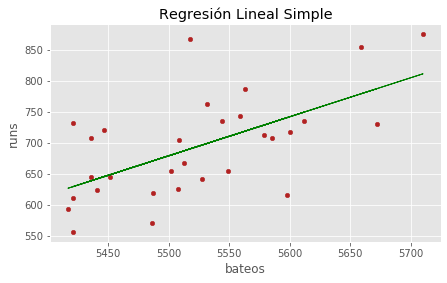

In [11]:

#Representamos el ajuste (rojo) y la recta Y = beta*x (verde)

 #Graficamos los datos junto con el modelo
fig, ax = plt.subplots(figsize=(7, 4))

datos.plot(
    x    = 'bateos',
    y    = 'runs',
    c    = 'firebrick',
    kind = "scatter",
    ax   = ax)


plt.plot(X, y_pred, color='green', linewidth=1)
plt.title('Regresión Lineal Simple')
#plt.xlabel()
#plt.ylabel('Valor medio')
plt.show()



Se puede para hacer la regresión mas óptima eliminando valores atípicos.
Un valor atípico es una observación que se encuentra anormalmente alejada de otros valores en un conjunto de datos. Los valores atípicos pueden ser problemáticos porque pueden afectar los resultados de un análisis.
Si quisiramos eliminar algunos valores del dataframe podemos hacerlos con unas funciones.
https://statologos.jaol.net/remove-outliers-python/

Utilice el rango intercuartílico.

El rango intercuartil (IQR) es la diferencia entre el percentil 75 (Q3) y el percentil 25 (Q1) en un conjunto de datos. Mide la dispersión del 50% medio de los valores.

Puede definir una observación como un valor atípico si es 1,5 veces el rango intercuartílico mayor que el tercer cuartil (Q3) o 1,5 veces el rango intercuartílico menor que el primer cuartil (Q1).

Valores atípicos = Observaciones> Q3 + 1.5 * IQR o Q1 – 1.5 * IQR

https://es.acervolima.com/2021/02/09/rango-intercuartilico-para-detectar-valores-atipicos-en-los-datos/
